In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from commons import DATASET_LOCATION

# Data Exploration

The dataset used in this project is sourced from [Kaggle](https://www.kaggle.com/datasets/basilb2s/language-detection). It contains data for language detection tasks, providing samples of text labeled with their corresponding languages.


In [23]:
df = pd.read_csv(DATASET_LOCATION)

First, I analyze the dataset to determine how many different languages are present.


In [24]:
print(df.shape)
print(df.columns)
print(df["Language"].unique())
print(df.info())
print(df.isna().sum())

(10337, 2)
Index(['Text', 'Language'], dtype='object')
['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB
None
Text        0
Language    0
dtype: int64


For this particular problem problem, we want to create a binary classifier to distinguish between Italian and not Italian phrases. Therefore, I create a column to map the language to italian and not italian

In [34]:
df["Binary Language"] = df["Language"].apply(lambda x: "Italian" if x == "Italian" else "Not Italian")

Now, we show the distribution of sentences to check the language distribution. 


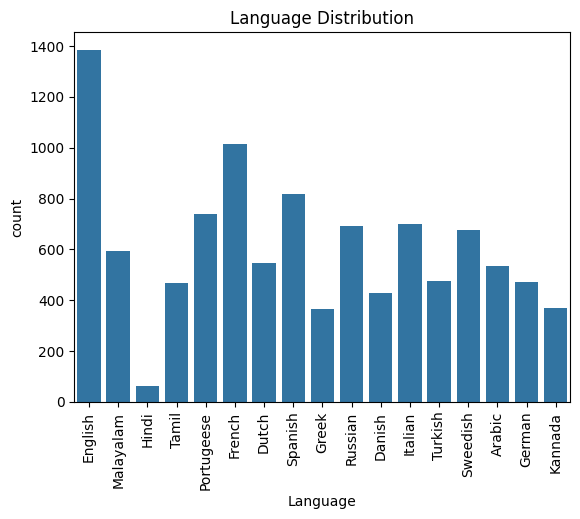

Language
English       0.133985
French        0.098094
Spanish       0.079230
Portugeese    0.071491
Italian       0.067524
Russian       0.066944
Sweedish      0.065396
Malayalam     0.057463
Dutch         0.052820
Arabic        0.051853
Turkish       0.045855
German        0.045468
Tamil         0.045371
Danish        0.041405
Kannada       0.035697
Greek         0.035310
Hindi         0.006095
Name: proportion, dtype: float64


In [27]:
sns.countplot(x="Language", data=df)
plt.title("Language Distribution")
plt.xticks(rotation=90)
plt.show()

print(df["Language"].value_counts(normalize=True))

We can observe that the dataset is imbalanced: Italian sentences make up only about 7% of the data, while non-Italian sentences account for the remaining 93%. We will address this imbalance during the data cleaning phase using an undersampling technique.

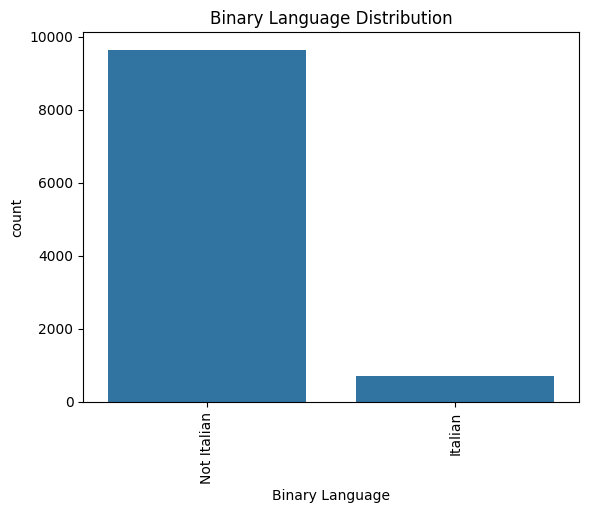

Binary Language
Not Italian    0.932476
Italian        0.067524
Name: proportion, dtype: float64


In [28]:
sns.countplot(x="Binary Language", data=df)
plt.title("Binary Language Distribution")
plt.xticks(rotation=90)
plt.show()

print(df["Binary Language"].value_counts(normalize=True))

We calculate additional features to analyze the distribution of sentences based on their length and the number of words.


In [29]:
df["text_length"] = df["Text"].apply(len)
df["word_count"] = df["Text"].apply(lambda x: len(str(x).split()))

df[["text_length", "word_count"]].describe()

,text_length,word_count
count,10337.000000,10337.000000
mean,124.055625,19.573861
std,253.688194,48.397149
min,1.000000,1.000000
25%,43.000000,7.000000
50%,100.000000,15.000000
75%,166.000000,25.000000
max,19088.000000,3735.000000




To verify the lengths of the sentences, it is important to note that for very short sentences, removing stopwords is not advisable, as it might leave us with too few features. To illustrate this, we show the distribution of sentences by word count and observe that there is still a non-negligible number of sentences with only a few words.


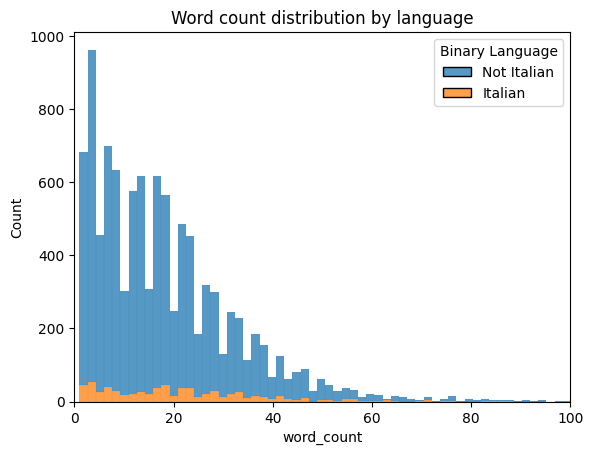

In [32]:
sns.histplot(data=df, x="word_count", bins="auto", hue="Binary Language", multiple="stack")
plt.title("Word count distribution by language")
plt.xlim(0, 100)
plt.show()

For a more in-depth analysis, we extract the 10 most frequent words for each language along with their respective frequencies. We observe the presence of stopwords among the most frequent words. Therefore, during the data cleaning phase, we will avoid removing them.


In [33]:
def get_top_words(df: pd.DataFrame, language: str, n: int=10) -> list[tuple[str, int]]:
    """
    Return the top N most frequent words in a dataset for a specified language.

    This function filters the DataFrame by the given language, tokenizes the text
    data by splitting on spaces (after lowercasing), and returns the `n` most
    common words along with their frequencies.

    Args:
        df (pd.DataFrame): The input DataFrame containing at least 'Language' and 'Text' columns.
        language (str): The language to filter the DataFrame by.
        n (int, optional): The number of top words to return. Defaults to 10.

    Returns:
        list[tuple[str, int]]: A list of tuples containing the most frequent words and their counts.

    """
    texts: pd.Series = df[df["Binary Language"] == language]["Text"]
    words: list[str] = " ".join(texts).lower().split()
    return Counter(words).most_common(n)


print(f"Top italian words: {get_top_words(df, 'Italian')}")
print(f"Top not italian words: {get_top_words(df, 'Not Italian')}")

Top italian words: [('di', 676), ('e', 369), ('che', 324), ('in', 278), ('è', 252), ('la', 241), ('un', 228), ('il', 225), ('a', 196), ('non', 186)]
Top not italian words: [('de', 3474), ('a', 1655), ('the', 1587), ('en', 1506), ('que', 1259), ('la', 1209), ('of', 1124), ('in', 936), ('and', 836), ('du', 793)]
